Este colab fue desarrollado por Arnold Charry Armero.

# Suavización Exponencial Doble

La Suavización Exponencial Doble toma en cuenta un factor adicional que la Suavización Exponencial Simple no consideraba: la tendencia. La desventaja de los promedios móviles es que se adecuan poco a la tendencia que tienen los datos. Por ello, los pronósticos en la mayoría de las veces terminan siendo menores que los valores de la demanda real. Por todo lo anterior, se instaura la Suavización Exponencial Doble que toma en cuenta la tendencia de los datos para darle una mayor sensibilidad a los pronósticos. Matemáticamente se modela con tres ecuaciones:

$$ F_{t} = \alpha (D_{t-1}) + (1-\alpha) (F_{t-1} + T_{t-1}) $$

$$ T_{t} = \beta (F_{t} - F_{t - 1}) + (1 - \beta ) T_{t-1} $$

$$ FIT_{t} = F_{t} \: + \: T_{t} $$

donde,

$ F_{t} = \mathrm{Pronostico \: Suavizado} $

$ F_{t-1} = \mathrm{Pronostico \: Anterior \: Suavizado} $

$ \alpha = \mathrm{Constante \: de \: Suavizacion} \: (0 \leq \alpha \leq 1)$

$ D_{t-1} = \mathrm{Demanda \: Real \: en \: el \: periodo \: anterior} $

$ T_{t} = \mathrm{Tendencia \: Suavizada} $

$ T_{t-1} = \mathrm{Tendencia \: Anterior \: Suavizada} $

$ \beta = \mathrm{Constante \: de \: Tendencia} \: (0 \leq \beta \leq 1)$

$ FIT_{t} = \mathrm{Nuevo \: Pronostico \: con \: tendencia} $

Ahora se continua con la implementación en código.

In [1]:
#Se importan las librerias
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates

In [2]:
#Conectamos con Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Se ingresa la base de datos
df = pd.read_csv("/content/drive/MyDrive/Operations I/sales-cars.csv")
df.head(10)

,Month,Sales
0,2016-01,266.0
1,2016-02,146.0
2,2016-03,183.0
3,2016-04,119.0
4,2016-05,180.0
5,2016-06,169.0
6,2016-07,232.0
7,2016-08,225.0
8,2016-09,193.0
9,2016-10,123.0


In [4]:
#Se pasa al formato de series de tiempo
df["Month"] = pd.to_datetime(df.iloc[:, 0], format = '%Y/%m')
df.head(10)

,Month,Sales
0,2016-01-01,266.0
1,2016-02-01,146.0
2,2016-03-01,183.0
3,2016-04-01,119.0
4,2016-05-01,180.0
5,2016-06-01,169.0
6,2016-07-01,232.0
7,2016-08-01,225.0
8,2016-09-01,193.0
9,2016-10-01,123.0


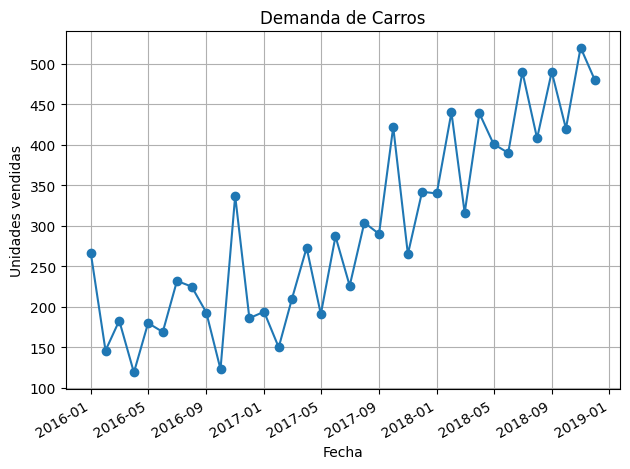

In [5]:
#Se realiza el gráfico de los datos
plt.plot_date(df.iloc[:, 0], df.iloc[:, 1], linestyle = 'solid')
plt.gcf().autofmt_xdate()

plt.title("Demanda de Carros")
plt.xlabel("Fecha")
plt.ylabel("Unidades vendidas")

plt.grid()
plt.tight_layout()
plt.show()

## Pronósticos con Suavización Exponencial Doble

### Suavización Exponencial Doble

Utilizando el conocimiento adquirido en Pensamiento Algorítmico, es posible crear una función con bucles y condicionales para pronosticar usando el método de Suavización Exponencial Doble a una columna de datos.

In [6]:
#Se realiza el código de la suavización exponencial doble manualmente

def Suavizacion_Exponencial_Doble(alpha, betha, initial_forecast, initial_trend, number_column):
  """
  Calcula la Suavización Exponencial Doble tomando en cuenta
  el alpha y betha escogidos.

  Args:
    alpha: Constante de suavización
    betha: Constante de tendencia
    initial_forecast: Valor inicial de pronóstico
    initial_trend: Valor inicial de tendencia
    number_column: Número de la columna seleccionada del dataframe.

  Returns:
    Double_Exponential_Smoothing: lista con los respectivos pronósticos.
  """

  if alpha >= 0 and alpha <= 1:
    if betha >= 0 and betha <= 1:
       Double_Exponential_Smoothing = []
       Ft_values = []
       Tt_values = []
       n = len(df.iloc[:, number_column])

       for i in range(n):
         if i == 0:
          Ft_values.append(initial_forecast)
          Tt_values.append(initial_trend)
          value = initial_forecast + initial_trend
          Double_Exponential_Smoothing.append(value)
         else:
          Ft = alpha * df.iloc[i - 1, number_column] + (1 - alpha) * (Ft_values[i - 1] + Tt_values[i - 1])
          Ft_values.append(Ft)
          Tt = betha * (Ft_values[i] - Ft_values[i - 1]) + (1 - betha) * Tt_values[i - 1]
          Tt_values.append(Tt)
          value = Ft_values[i] + Tt_values[i]
          Double_Exponential_Smoothing.append(value)

       return Double_Exponential_Smoothing

    else:
      print("El parámetro betha no está entre 0 y 1.")
  else:
    print("El parámetro alpha no está entre 0 y 1.")

In [7]:
#Si la constante de suavización no está entre 0 y 1
Suavizacion_Exponencial_Doble(1.2, 0.4, 266, 10, 1)

El parámetro alpha no está entre 0 y 1.


In [8]:
#Si la constante de tendencia no está entre 0 y 1
Suavizacion_Exponencial_Doble(0.8, 1.3, 266, 10, 1)

El parámetro betha no está entre 0 y 1.


In [9]:
df.insert(loc = 2, column = "Suavización Exponencial Doble (OPI Función)", value = Suavizacion_Exponencial_Doble(0.3, 0.5, 266, 10, 1))
df

,Month,Sales,Suavización Exponencial Doble (OPI Función)
0,2016-01-01,266.0,276.000000
1,2016-02-01,146.0,281.500000
2,2016-03-01,183.0,229.025000
3,2016-04-01,119.0,196.488750
4,2016-05-01,180.0,142.890062
5,2016-06-01,169.0,129.237472
6,2016-07-01,232.0,122.345038
7,2016-08-01,225.0,152.868578
8,2016-09-01,193.0,182.954770
9,2016-10-01,123.0,195.921888


### Suavización Exponencial Doble con Funciones de StatsModels

In [10]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model_double = ExponentialSmoothing(df['Sales'], initialization_method="known", trend='additive',seasonal=None, initial_level = 266, initial_trend=10)
model_double_fit = model_double.fit(smoothing_level=0.3, smoothing_trend =0.5, optimized=False)
DoubleExpSmoothing_Pandas = model_double_fit.fittedvalues[:]

In [11]:
df.insert(loc = 3, column = "Suavización Exponencial Doble (Función de StatsModels)", value = DoubleExpSmoothing_Pandas)
df

,Month,Sales,Suavización Exponencial Doble (OPI Función),Suavización Exponencial Doble (Función de StatsModels)
0,2016-01-01,266.0,276.000000,276.000000
1,2016-02-01,146.0,281.500000,281.500000
2,2016-03-01,183.0,229.025000,229.025000
3,2016-04-01,119.0,196.488750,196.488750
4,2016-05-01,180.0,142.890062,142.890062
5,2016-06-01,169.0,129.237472,129.237472
6,2016-07-01,232.0,122.345038,122.345038
7,2016-08-01,225.0,152.868578,152.868578
8,2016-09-01,193.0,182.954770,182.954770
9,2016-10-01,123.0,195.921888,195.921888


### Errores de Pronóstico

Para tener los errores, se comparan los valores reales de demanda con los valores pronosticados. De tal forma que se modela matemáticamente como,

$$ \mathrm{Error \: de \: Pronostico} = \begin{vmatrix}
\mathrm{Demanda \: Real} - \mathrm{Valor \: Pronosticado}
\end{vmatrix} $$

$$ \mathrm{Error \: de \: Pronostico} = \begin{vmatrix}
D_{t} - FIT_{t}
\end{vmatrix} $$

In [12]:
# Se calculan los errores

def Errores(number_column, forecast_column):
  """
  Calcula los errores tomando en cuenta los n valores anteriores

  Args:
    number_column: Número de la columna seleccionada del dataframe.
    forecast_column: Número de la columna en la que se hizo el pronóstico.
  Returns:
    Errors: lista con los errores de los respectivos pronósticos.
  """

  Errors = []
  l = len(df.iloc[:, number_column])

  for i in range(l):
    Error = np.abs(df.iloc[i, number_column] - df.iloc[i, forecast_column])
    Errors.append(Error)

  return Errors

In [13]:
df.insert(loc = 4, column = "Errores (OPI Función)", value = Errores(1, 2))
df

,Month,Sales,Suavización Exponencial Doble (OPI Función),Suavización Exponencial Doble (Función de StatsModels),Errores (OPI Función)
0,2016-01-01,266.0,276.000000,276.000000,10.000000
1,2016-02-01,146.0,281.500000,281.500000,135.500000
2,2016-03-01,183.0,229.025000,229.025000,46.025000
3,2016-04-01,119.0,196.488750,196.488750,77.488750
4,2016-05-01,180.0,142.890062,142.890062,37.109938
5,2016-06-01,169.0,129.237472,129.237472,39.762528
6,2016-07-01,232.0,122.345038,122.345038,109.654962
7,2016-08-01,225.0,152.868578,152.868578,72.131422
8,2016-09-01,193.0,182.954770,182.954770,10.045230
9,2016-10-01,123.0,195.921888,195.921888,72.921888


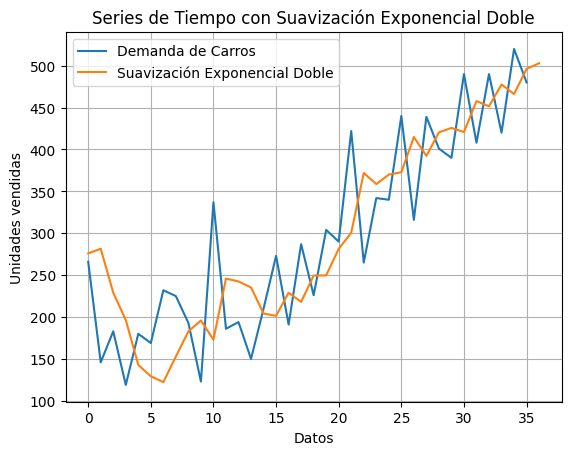

In [14]:
#Graficamos varios de los resultados
plt.plot(df.iloc[:, 1], label = 'Demanda de Carros')
plt.plot(df.iloc[:, 2], label = 'Suavización Exponencial Doble')
plt.grid()
plt.legend(loc = 'best')
plt.title('Series de Tiempo con Suavización Exponencial Doble')
plt.xlabel("Datos")
plt.ylabel("Unidades vendidas")
plt.show()

### MAD

Una medida muy importante utilizada para medir el error global de un tipo de pronóstico es el MAD, el cual es el promedio de los errores. Matemáticamente se define así:

$$ \mathrm{MAD} = \frac{\sum \begin{vmatrix}
\mathrm{Demanda \: Real} - \mathrm{Valor \: Pronosticado}
\end{vmatrix}}{n} $$

In [15]:
#Se crea la función
def calcular_mad_double(parameters):

  """
  Calcula el MAD de la Suavización Exponencial Doble tomando
  en cuenta el alpha y betha ingresados.

  Args:
    parameters: lista o arreglo con alpha y betha como
    componentes del vector.

  Returns:
    mad: Número float con la desviación absoluta media (MAD).
  """

  alpha = parameters[0]
  betha = parameters[1]

  from statsmodels.tsa.holtwinters import ExponentialSmoothing
  model = ExponentialSmoothing(df['Sales'], initialization_method = "known", trend='additive', seasonal=None, initial_level = 266, initial_trend = 10)
  model_double_fit = model.fit(smoothing_level=alpha, smoothing_trend = betha, optimized=False)

  data_w1 = df['Sales'][:-1]
  data_m1 = model_double_fit.fittedvalues[:-1]

  mad = np.mean(np.abs(data_w1-data_m1))

  return mad

In [ ]:
#Otra forma de Calcular el MAD
calcular_mad_double([0.3, 0.5])

57.41337987922616

### Optimización del Alpha y del Betha

Ahora bien, haciéndo uso de los conocimientos de Analítica I y Matemáticas Aplicadas I, se puede minimizar la función objetivo MAD para obtener el mínimo error.

$ \mathbf{f.o.} $
$$ \mathit{min} \: \: \mathrm{MAD} = \frac{\sum \begin{vmatrix}
\mathrm{Demanda \: Real} - \mathrm{Valor \: Pronosticado}
\end{vmatrix}}{n} $$

$ \mathbf{s.a.} $
$$0 \leq \alpha \leq 1$$

$$0 \leq \beta \leq 1$$

donde,

$ \alpha = \mathrm{Constante \: de \: Suavizacion}$

$ \beta = \mathrm{Constante \: de \: Tendencia}$

In [16]:
#Realizando la optimización

from scipy import optimize

x0 = [0.3, 0.5]

def c1(parameters):
  return parameters[0]

def c2(parameters):
  return parameters[1]

def c3(parameters):
  return -(parameters[0] - 1)

def c4(parameters):
  return -(parameters[1] - 1)

bnds = [(0.0, 1.0), (0.0, 1.0)]

result = optimize.minimize(calcular_mad_double, x0, constraints = [{'type':'ineq','fun':f} for f in [c1,c2,c3,c4]], bounds = bnds, method = 'SLSQP')
result

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 51.03046719161504
       x: [ 1.632e-01  5.723e-01]
     nit: 43
     jac: [ 2.296e+01  1.937e+00]
    nfev: 216
    njev: 43

In [17]:
#Alpha óptimo
result.x[0]

0.163184939461503

In [18]:
#Betha óptimo
result.x[1]

0.5723366539377557

In [19]:
#MAD resultante
Optimized_MAD = result.fun
print(Optimized_MAD)

51.03046719161504


In [20]:
#Comprobando los parámetros que se introdujeron al modelo
model_double_fit.params_formatted

,name,param,optimized
smoothing_level,alpha,0.3,False
smoothing_trend,beta,0.5,False
initial_level,l.0,266.0,False
initial_trend,b.0,10.0,False


In [21]:
# El módulo StatsModel permite colocar los parámetros óptimos y más adecuados
model_double = ExponentialSmoothing(df['Sales'], initialization_method="estimated", trend='additive', seasonal=None)
model_double_fit = model_double.fit(smoothing_level = 0.3, smoothing_slope= 0.5, optimized=False)
model_double_fit.fittedvalues[:-1]

<ipython-input-21-783b7010b43b>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model_double_fit = model_double.fit(smoothing_level = 0.3, smoothing_slope= 0.5, optimized=False)


0     195.054545
1     224.434545
2     197.235364
3     187.160632
4     150.684225
5     147.848106
6     145.735607
7     176.096517
8     202.584676
9     210.088686
10    181.278190
11    248.669115
12    241.142394
13    231.202331
14    198.863937
15    195.897471
16    224.286324
17    214.565572
18    247.426210
19    248.914725
20    281.619477
21    301.569882
22    373.199683
23    360.010591
24    371.176638
25    373.716375
26    415.436735
27    392.525477
28    420.358774
29    425.538266
30    420.533171
31    457.449629
32    451.273705
33    477.359502
34    466.015635
35    496.172583
dtype: float64

In [22]:
# Comprobando los nuevos parámetros que se introdujeron al modelo
model_double_fit.params_formatted
# Se puede observar que se ajusta el pronóstico inicial y la tendencia inicial

,name,param,optimized
smoothing_level,alpha,0.300000,False
smoothing_trend,beta,0.500000,False
initial_level,l.0,197.600000,False
initial_trend,b.0,-2.545455,False


### Referencias
*   Heizer, J., & Render, B. (2004). Principios de administración de operaciones.
*   Lind, D. A., Marchal, W. G., & Wathen, S. A. (2005). Estadística aplicada a los negocios y a la economía.